Week 6 MINI PROJECT REPORT – Linear Regression Prediction Model

    Domain: Education                                       Team mates: Punith BR,Hemanth KR

    Topic: Student marks prediction according to their IA,Tution,Midterm marks.

    Purpose:
       This model help the students to monitor on their studies. So, they can study hard in differnt aspects to secure good marks in their Final exams.
       Understanding the factors that influence Final marks can ensure individuals to concentrate high on them.

Step 1 : Data preprocessing

In [1]:
import pandas as pd 
data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\student_marks.csv").head(50)
print("Data information ")
print(data.info())
print("\n\nMissing number of values before imputing \n",data.isna().sum())
data.bfill(inplace=True)
data.ffill(inplace=True)
print("\n\nMissing number of values after imputing \n",data.isna().sum())



Data information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      50 non-null     int64  
 1   Assignment  45 non-null     float64
 2   Tutorial    45 non-null     float64
 3   Midterm     44 non-null     float64
 4   TakeHome    48 non-null     float64
 5   Final       47 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.5 KB
None


Missing number of values before imputing 
 Prefix        0
Assignment    5
Tutorial      5
Midterm       6
TakeHome      2
Final         3
dtype: int64


Missing number of values after imputing 
 Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      0
Final         0
dtype: int64


• Detected number of missing values in each column using isna().sum()

• Imputed them using ffill() function.

Observation :

        It is observer that after imputation the dataset doesn't contain any missing values and it is cleaned and ready of the models training/testing.


Outliers

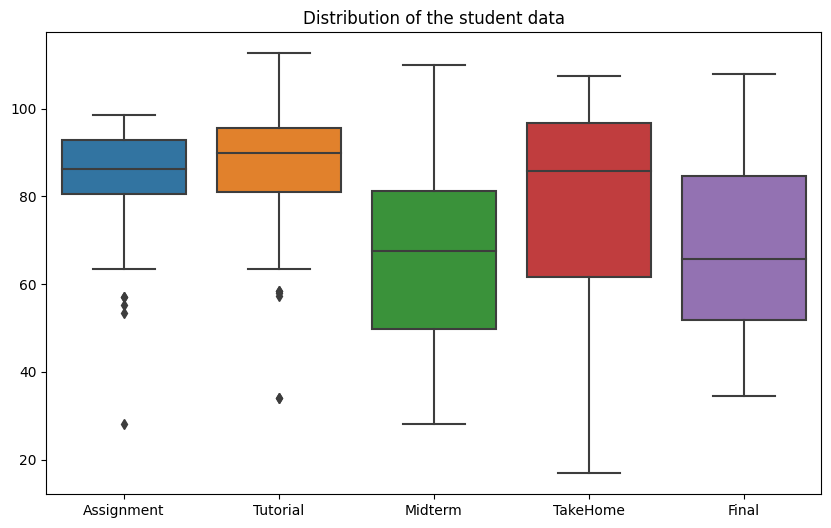

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data[['Assignment','Tutorial','Midterm','TakeHome','Final']])
plt.title("Distribution of the student data") 
plt.show()

Observations:

    • Displayed data distribution using Boxplot for each and every column.
    • Columns like Assignment, Tutorial, TakeHome contains some outlies.
    • I don't replace them or remove them becaut e they may be a genuine data(Keep as is).

Step 2 : Data Exploration

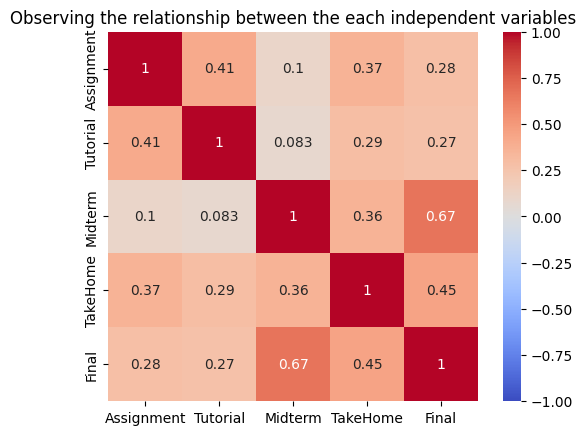

In [3]:
sns.heatmap(data[['Assignment','Tutorial','Midterm','TakeHome','Final']].corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm',square=True)
plt.title("Observing the relationship between the each independent variables")
plt.show()

Observation:

    • From the above heatmap it is observed that for my target variable('Final') there is a good relationships with the independent variables['Assignment','Tutorial','Midterm'].
    


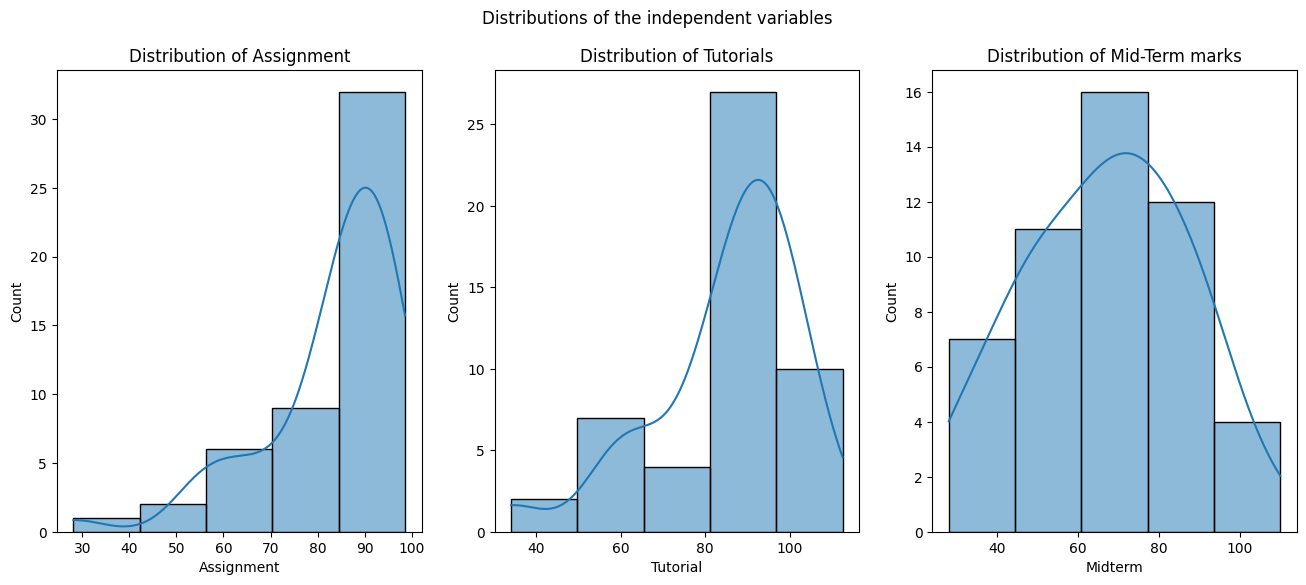

In [4]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.histplot(data['Assignment'],bins=5,kde=True)
plt.title("Distribution of Assignment")

plt.subplot(1,3,2)
sns.histplot(data['Tutorial'],bins=5,kde=True)
plt.title("Distribution of Tutorials")

plt.subplot(1,3,3)
sns.histplot(data['Midterm'],bins=5,kde=True)
plt.title("Distribution of Mid-Term marks")

plt.suptitle("Distributions of the independent variables")
plt.show()

Observation:

    • It is observed that the Midterm marks is symmetrically  distributed and we need to prioritize this variable.
    • Remaining 2 variables are skewed toward the right(Negatively skewed). 

Exploration Analysis Result

    • I took Assignment, Tution, Midterm marks as a independent variables to predict the final marks from the above observed plots.

Step 3 : Data splitting, Model building and evaluation

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

x = data[['Assignment','Tutorial','Midterm']]
y = data[['Final']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=13)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print('Mean Squared Error:',mse) 
print('R-squared (R2):',r2)


Mean Squared Error: 141.8739984528801
R-squared (R2): 0.3787735435306726


In [6]:
y_test


,Final
43,82.22
4,73.89
20,66.11
46,65.28
0,52.50
14,35.83
36,47.78
28,85.56
24,56.39
6,50.00


Explanation: 

    o Independent variable : ['Assignment','Tution','Midterm']
    o Target varable : [‘Final’]
    o Splitting Data to 80:20 ratio which means 80 percent data for training 20 precent of data for testing using train_test_split method
    o Created Linear regression model using LinearRegression() method.
    o Predicted error rate using mean_squared_error method and R2 score using r2_score method.

Observation:

    o MSE is a average squared difference between the predicted values and the actual values in a dataset.
    o Lower MSE values suggest better model performance.
    o R-squared values range from 0 to 1, where 1 indicates that all of the variance in the dependent variable is explained by the model, and 0 indicates that the model doesn't explain any of the variance. Therefore, an R2 of 0.6112 is quite good for my model.

Model Working Demo

In [7]:
# ass = float(input("Enter your assignment marks : "))
# tut = float(input("Enter your tutorial marks : "))
# mid = float(input("Enter your midterm marks : "))

    
    
# new_data = np.array([ass,tut,mid]).reshape(-1,3)
# a = model.predict(new_data)
# print("The predicted final marks is ",float(a))

Model message for student according to prdicted marks

    • >=85 Keep going no one can stop you from becoming a successful person.
    • >=70 & <85 Spend few more hours in your study to secure more to get selected On-Campus.
    • >=50 & <70 Try to study or else you won't be selected in Off-Campus also.
    • <50 If you won't study you can't get marriage also.

Week 8 Mini Project - `Decision Tree Classifier`

Data Pre-Processing

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\Rice_Osmancik_Cammeo_Dataset.csv")

print("Dataset information")
print(data.info())
print("\n\nNull values\n",data.isna().sum())
data.head()



Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          3810 non-null   int64  
 1   PERIMETER     3810 non-null   float64
 2   MAJORAXIS     3810 non-null   float64
 3   MINORAXIS     3810 non-null   float64
 4   ECCENTRICITY  3810 non-null   float64
 5   CONVEX_AREA   3810 non-null   int64  
 6   EXTENT        3810 non-null   float64
 7   CLASS         3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB
None


Null values
 AREA            0
PERIMETER       0
MAJORAXIS       0
MINORAXIS       0
ECCENTRICITY    0
CONVEX_AREA     0
EXTENT          0
CLASS           0
dtype: int64


,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


Exploration

Unique class of rice in the dataset are  ['Cammeo' 'Osmancik']


C:\Users\Admin\AppData\Local\Temp\ipykernel_7476\2882610569.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr('spearman'),annot=True,vmin=-1,vmax=1,center=True)


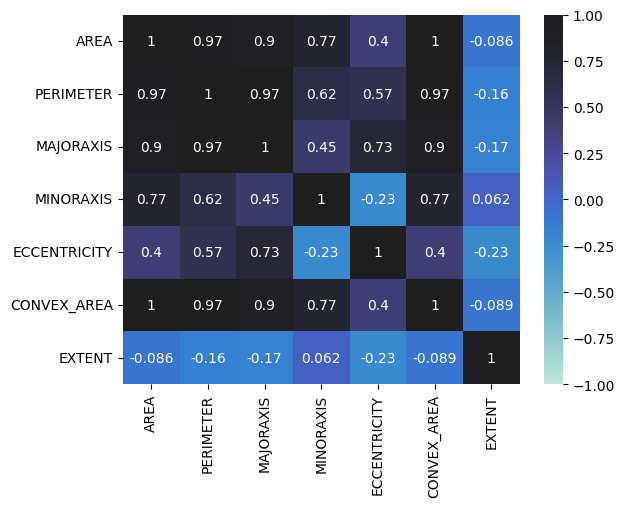

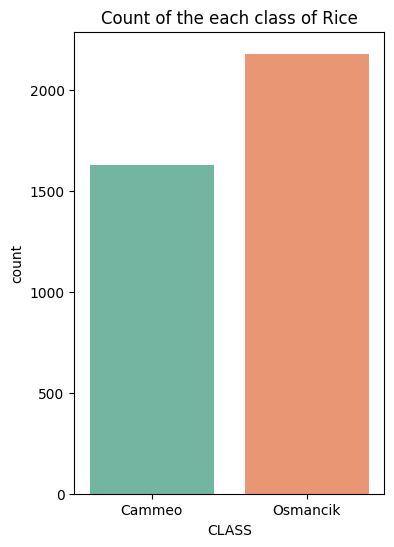

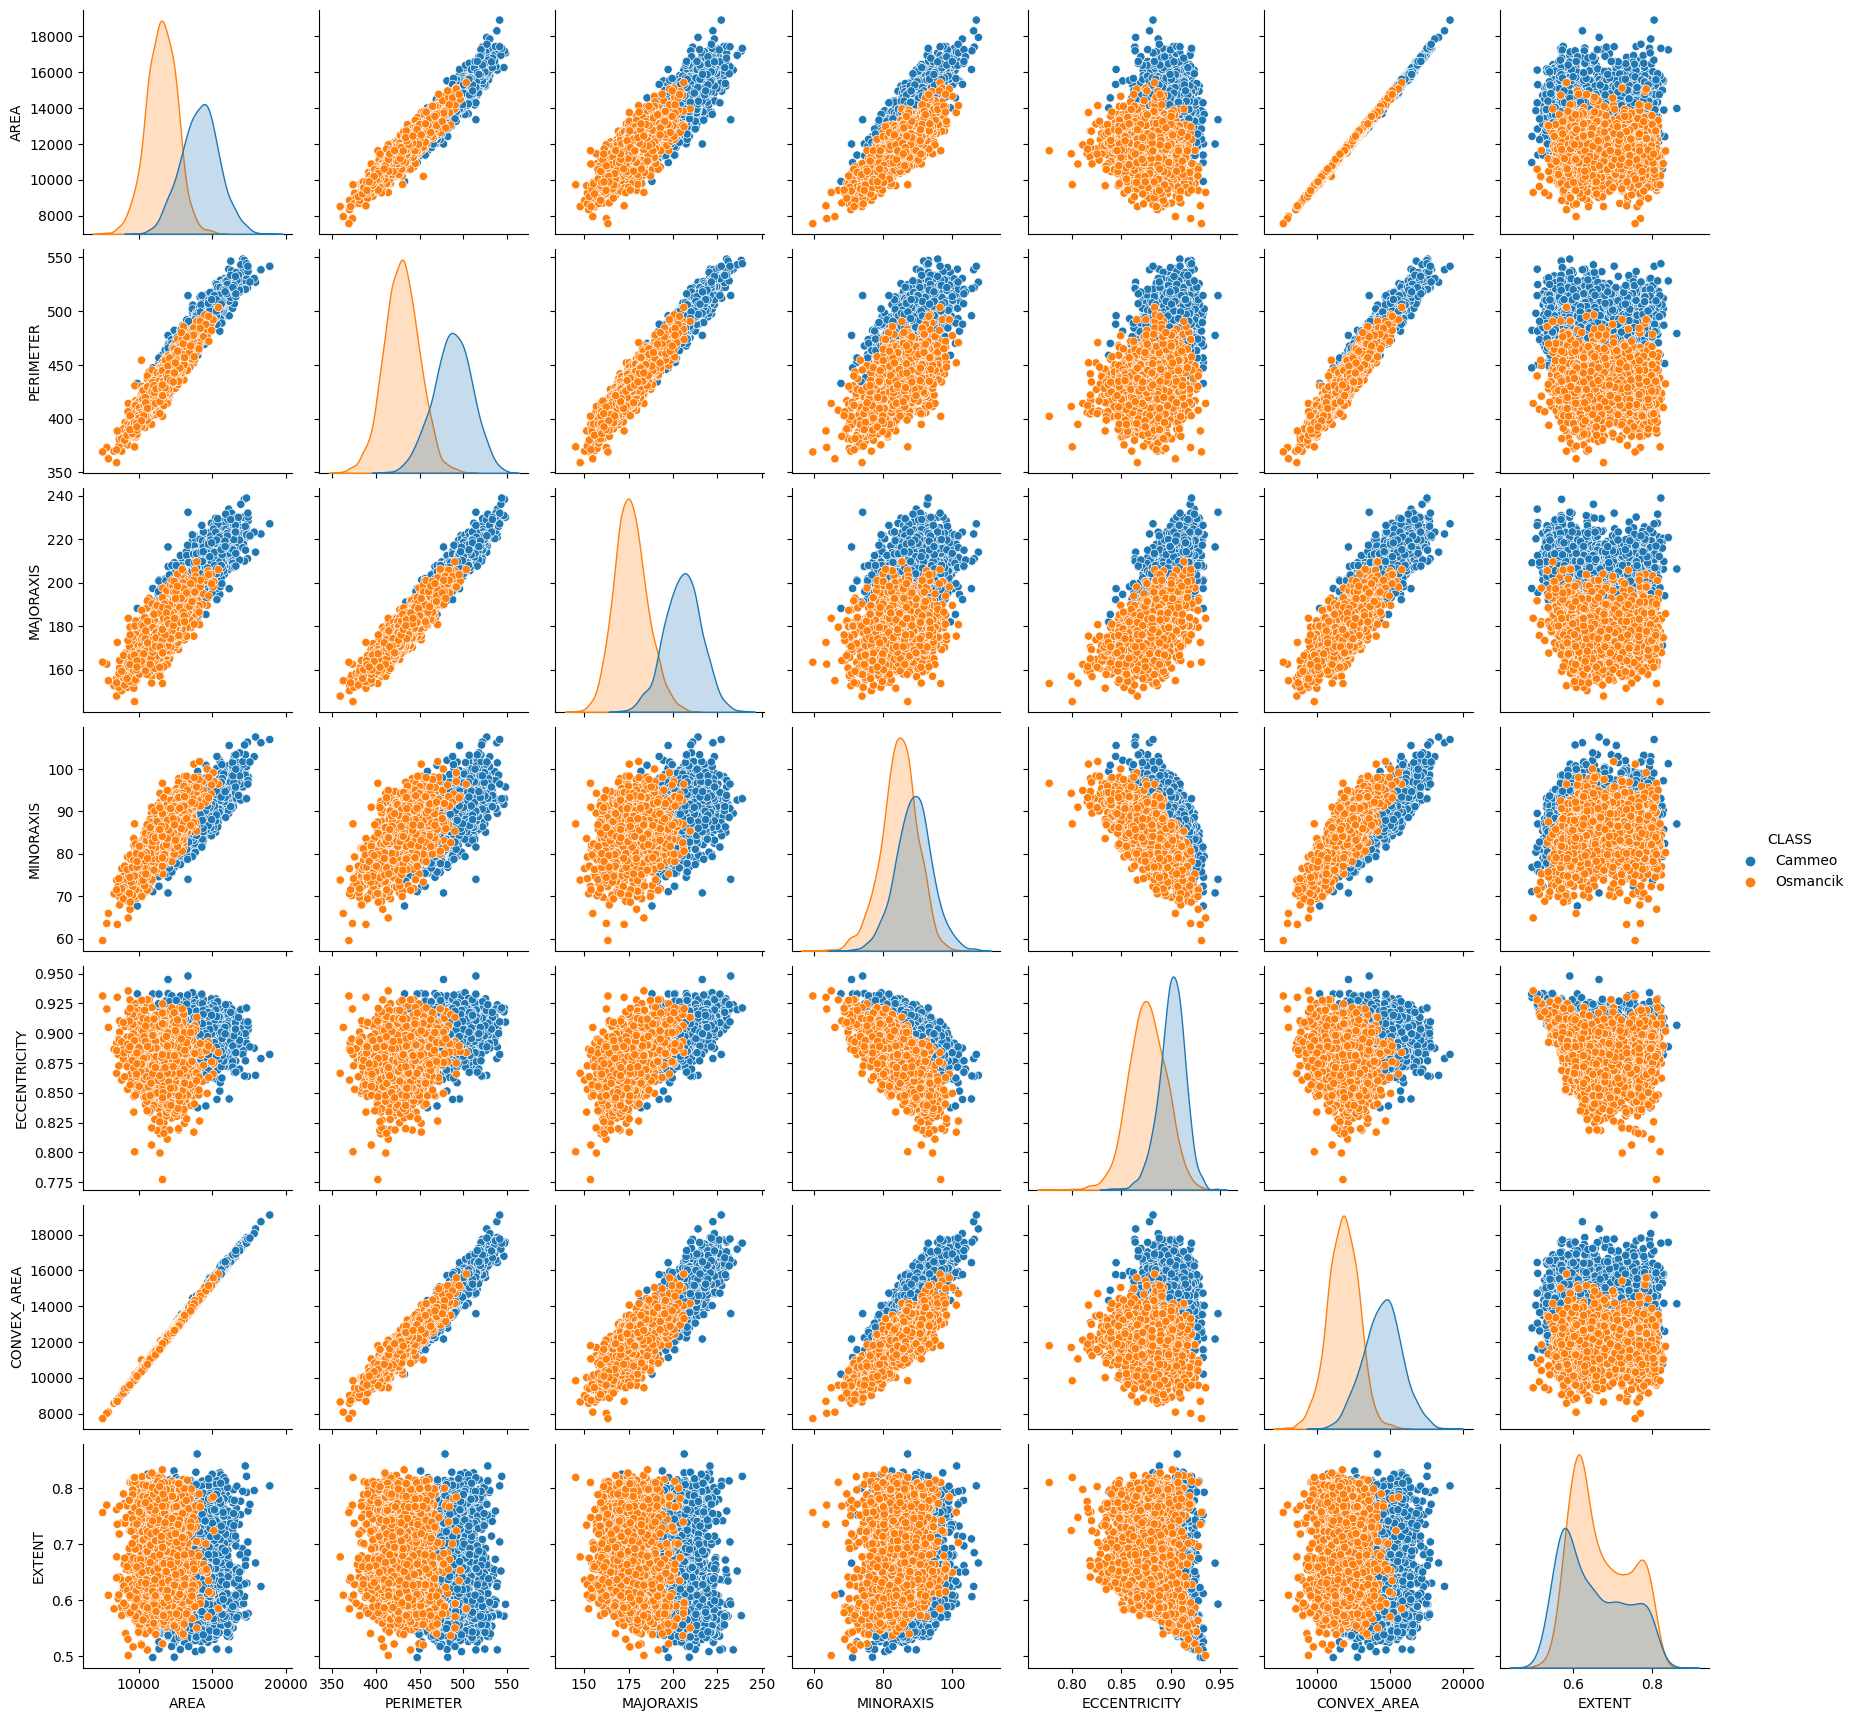

In [38]:
print("Unique class of rice in the dataset are ",data['CLASS'].unique())

sns.heatmap(data.corr('spearman'),annot=True,vmin=-1,vmax=1,center=True)

# sns.catplot(data=data , x='CLASS',kind='count')
plt.figure(figsize=(4,6))
sns.countplot(data=data, x='CLASS',palette='Set2')
plt.title("Count of the each class of Rice")
plt.show()

sns.pairplot(data,hue="CLASS")
plt.show()



Data-Splitting, Model building and Model evaluation

Accuracy is  0.9275970619097587


Classification report is 
               precision    recall  f1-score   support

      Cammeo       0.94      0.89      0.92       418
    Osmancik       0.92      0.96      0.94       535

    accuracy                           0.93       953
   macro avg       0.93      0.92      0.93       953
weighted avg       0.93      0.93      0.93       953



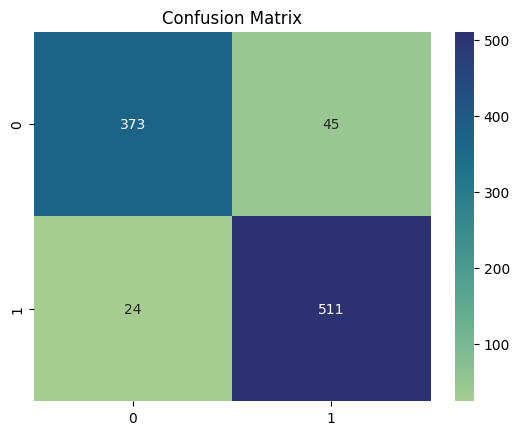

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier

x = data.drop(['CLASS'],axis=1)
y = data['CLASS']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=13)
model = DecisionTreeClassifier(criterion='entropy',random_state=11,max_depth=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy is ",accuracy_score(y_test,y_pred))
print("\n\nClassification report is \n",classification_report(y_test,y_pred))


cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='crest')
plt.title("Confusion Matrix")
plt.show()

Visualizing the Decision Tree

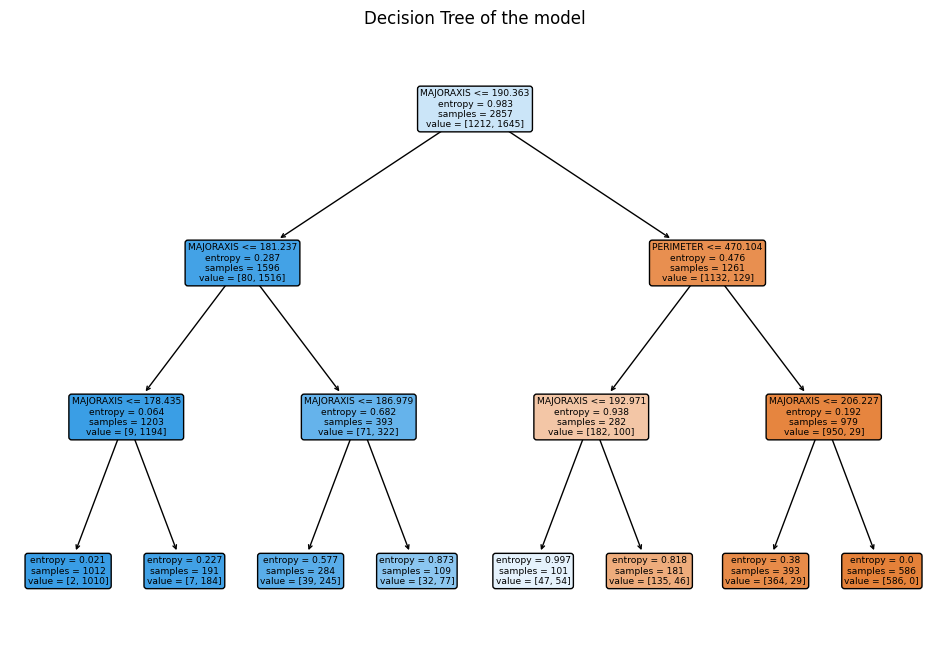

In [46]:
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming 'data' is a DataFrame containing your dataset
# Replace this with your actual data loading process
# Example: data = pd.read_csv('your_dataset.csv')
# Make sure 'data' includes a column 'CLASS' and other features

# Assuming you have loaded your data correctly
# x = data.drop(['CLASS'], axis=1)
# y = data['CLASS']
#x_columns = ['AREA','PERIMETER','MAJORAXIS','MINORAXIS','ECCENTRICITY','CONVEX_AREA','EXTENT']
#y_columns = ['CLASS']

# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13)

# model = DecisionTreeClassifier(max_depth = 3,criterion ='entropy')
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# col = ['AREA','PERIMETER','MAJORAXIS','MINORAXIS','ECCENTRICITY','CONVEX_AREA','EXTENT']

# data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\Rice_Osmancik_Cammeo_Dataset.csv")

plt.figure(figsize=(12,8))
tree.plot_tree(model,
               feature_names=data.columns.tolist(),
            #    class_names = y.unique().astype(str),  # Convert class names to strings
            #    class_names = y_columns,
               filled=True,
               rounded=True)
plt.title("Decision Tree of the model")
plt.show()


Working of the week 8 model

In [25]:
data.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


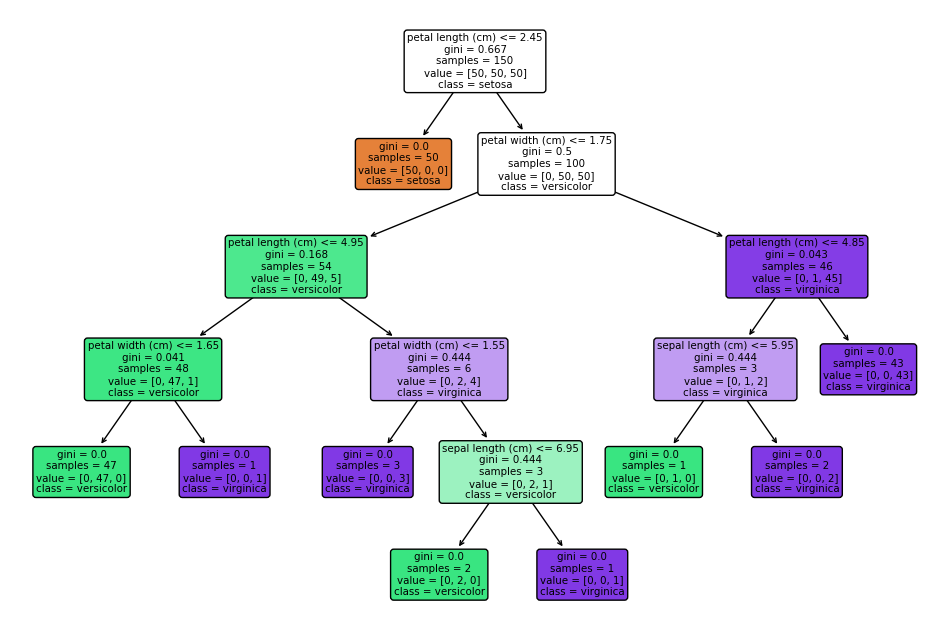

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load a sample dataset (you can replace this with your own data)
data = load_iris()
X = data.data
y = data.target

# Create and fit a decision tree classifier
model = DecisionTreeClassifier()
model.fit(X, y)

# Convert the target class names to a list
class_names = data.target_names.tolist()

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, 
               feature_names=data.feature_names,
               class_names=class_names,  # Use the list of class names
               filled=True,rounded = True)
plt.show()


Week 8 Mini project 

`Classifier using Randomforest Classifier`

In [1]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score,confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder

# # bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
# data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\crypto-markets.csv")
# # data.drop(['date'],axis=1,inplace=True)
# print(data.head())

# column = ['date','name']
# label_encoder = {}
# for i in column:
#     label_encoder[i] = LabelEncoder()
#     data[i] = label_encoder[i].fit_transform(data[i])

# X = data.drop(['symbol'],axis=1)
# y = data['symbol']

# X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13)

# model = RandomForestClassifier(n_estimators = 10, criterion='entropy',random_state=13,bootstrap=True,min_samples_split=2,max_depth=5)
# model.fit(X_train,y_train)

# y_pred = model.predict(X_test)

# cm = confusion_matrix(y_test,y_pred)
# plt.figure(figsize=(40,40))
# sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',vmin=-1,vmax=1)
# plt.title("Comfusion Matrix")
# plt.tight_layout()
# plt.show()

# print("Accuracy of the classifier model is ",accuracy_score(y_test,y_pred))

  symbol        date    open    high     low   close  volume      market  \
0    BTC  2013-04-28  135.30  135.98  132.10  134.21       0  1500520000   
1    BTC  2013-04-29  134.44  147.49  134.00  144.54       0  1491160000   
2    BTC  2013-04-30  144.00  146.93  134.05  139.00       0  1597780000   
3    BTC  2013-05-01  139.00  139.89  107.72  116.99       0  1542820000   
4    BTC  2013-05-02  116.38  125.60   92.28  105.21       0  1292190000   

      name  ranknow  
0  Bitcoin        1  
1  Bitcoin        1  
2  Bitcoin        1  
3  Bitcoin        1  
4  Bitcoin        1  


Data before droping the unwanted independent variables
   symbol        date    open    high     low   close  volume      market  \
0    BTC  28-04-2013  135.30  135.98  132.10  134.21       0  1500520000   
1    BTC  29-04-2013  134.44  147.49  134.00  144.54       0  1491160000   
2    BTC  30-04-2013  144.00  146.93  134.05  139.00       0  1597780000   
3    BTC  01-05-2013  139.00  139.89  107.72  116.99       0  1542820000   
4    BTC  02-05-2013  116.38  125.60   92.28  105.21       0  1292190000   

      name  ranknow  
0  Bitcoin        1  
1  Bitcoin        1  
2  Bitcoin        1  
3  Bitcoin        1  
4  Bitcoin        1  

Data after droping the unwanted independent variables
      open    high     low   close  volume      market     name  ranknow
0  135.30  135.98  132.10  134.21       0  1500520000  Bitcoin        1
1  134.44  147.49  134.00  144.54       0  1491160000  Bitcoin        1
2  144.00  146.93  134.05  139.00       0  1597780000  Bitcoin        1
3  139.00  

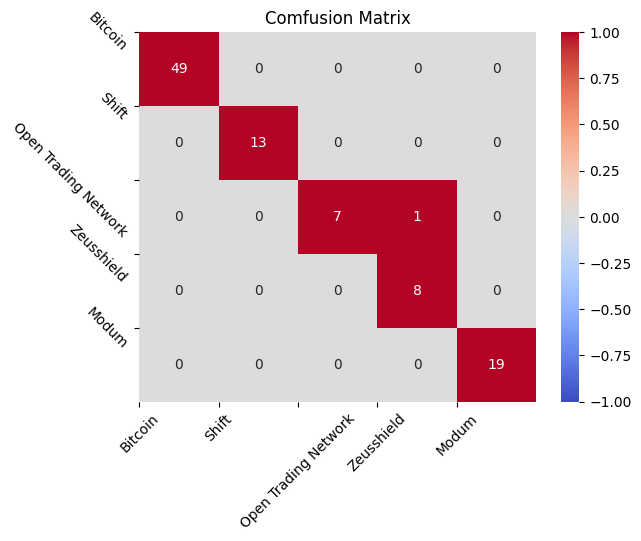

Accuracy of the classifier model is  0.9896907216494846


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder

# bitcoindf['date'] = pd.to_datetime(bitcoindf.date)
data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\crypto.csv")
# data.drop(['date'],axis=1,inplace=True)
print("Data before droping the unwanted independent variables\n",data.head())

# column = ['date','name']
# label_encoder = {}
# for i in column:
#     label_encoder[i] = LabelEncoder()
#     data[i] = label_encoder[i].fit_transform(data[i])

data = data.drop(['symbol','date'],axis=1)
X = data.drop(['name'],axis=1)
y = data['name']
print("\nData after droping the unwanted independent variables\n",data.head())

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=13)

model = RandomForestClassifier(n_estimators = 5, criterion='entropy',random_state=13,bootstrap=True,min_samples_split=2,max_depth=3)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

unique_outputs = list(data['name'].unique())
print(unique_outputs)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',vmin=-1,vmax=1)
plt.title("Comfusion Matrix")
plt.xticks([0,1,2,3,4],['Bitcoin','Shift','Open Trading Network','Zeusshield', 'Modum'],rotation=45)
plt.yticks([0,1,2,3,4],['Bitcoin','Shift','Open Trading Network','Zeusshield', 'Modum'],rotation=315)
plt.show()

print("Accuracy of the classifier model is ",accuracy_score(y_test,y_pred))



from sklearn.tree import export_graphviz
import graphviz
features = data.columns.tolist()
features.pop(5)

# Assuming you have a trained Random Forest model 'rf' and you want to visualize the first tree
# tree = model.estimators_[3]  # Change the index to visualize a different tree

# # Export the decision tree to a Graphviz format
# dot_data = export_graphviz(tree, out_file=None, 
#                            feature_names= features,
#                         #    class_names=your_class_names,
#                            filled=True, rounded=True, special_characters=True)

# # Create a graph from the Graphviz data and display it
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree_classifier")  # Save the tree to a file (optional)
# graph.view("decision_tree_classifier")



for i, tree in enumerate(model.estimators_):
    dot_data = export_graphviz(tree, out_file=None, 
                               feature_names=features,
                               filled=True, rounded=True, special_characters=True)

    # Create a graph from the Graphviz data and display it
    graph = graphviz.Source(dot_data)
    graph.render(f"decision_tree_{i}")  # Save each tree with a unique name
    graph.view(f"decision_tree_{i}")

Week 8 

`Regression using Randomforest`


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\insurance.csv")

print("Data before encoding them \n",data.head())

column = ['sex','smoker','region']
label_encoder = {}
for i in column:
    label_encoder[i] = LabelEncoder()
    data[i] = label_encoder[i].fit_transform(data[i])
print("\n\nData after encoding them \n",data.head())

x = data.drop(['charges'],axis=1)
y = data['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=13)

model = RandomForestRegressor(n_estimators=5,random_state=13,bootstrap=True,min_samples_split=2,max_depth=2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("\nRoot Mean squared error of the model is ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("\nR_2 score of the model is ",r2_score(y_test,y_pred))



from sklearn.tree import export_graphviz
import graphviz
features = data.columns.tolist()
features.pop()

# Assuming you have a trained Random Forest model 'rf' and you want to visualize the first tree
for i, tree in enumerate(model.estimators_):
    dot_data = export_graphviz(tree, out_file=None, 
                               feature_names=features,
                               filled=True, rounded=True, special_characters=True)

    # Create a graph from the Graphviz data and display it
    graph = graphviz.Source(dot_data)
    graph.render(f"decision_tree_{i}")  # Save each tree with a unique name
    graph.view(f"decision_tree_{i}")


Data before encoding them 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Data after encoding them 
    age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

Root Mean squared error of the model is  4126.631645487449

R_2 score of the model is  0.8756923933713496


Week 10

`Rebuid model using Neural Network` for regressor problem

In [31]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\insurance.csv")

print("\nStatistical information of the data\n ")
print("\n",data.info())
print("\n\nDataset \n",data.head())
print("\n\n")

categorical_columns = ['sex','smoker','region']
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
    
# x = data.drop(['sex','smoker','region'],axis=1)
x = data
y = data['charges'].values

x_train,x_test,y_train,y_test= train_test_split(x,y)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu',input_dim = x_train.shape[1]),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1)
y_pred = model.predict(x_test)
print("\n\n")
print("MSE : ",mean_squared_error(y_test,y_pred))
print("R2 score : ",r2_score(y_test,y_pred))
print(type(x_test))
import numpy as np
# test = pd.DataFrame({'age' : [19],
#                     'sex' : [0],
#                     'bmi' : [28],
#                     'children' : [0],
#                     'smoker' : [0],
#                     'region' : [3],
#                     'charges' : [16800]})
test = np.array([16,0,28,0,0,3,16800]).reshape(-1,7)
print("\n\n")
result = model.predict(test)
print("Model predicted chargers for the given data",result)


Statistical information of the data
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

 None


Dataset 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520



Epoch 1/10
101/101 [===============

`Rebuild model using Neural Network` for  Classifier dataset


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\Folders\\Datasets\\crypto.csv')

# data.drop(['date'],axis=1,inplace=True)
print("Data before droping the unwanted independent variables\n",data.head())

unique_outputs = list(data['name'].unique())
print("Unique outputs in the dataset is \n",unique_outputs)

data = data.drop(['symbol','date','ranknow'],axis=1)
X = data.drop(['name'],axis=1)
y = data['name']


print("\nData after droping the unwanted independent variables\n",data.head())
print("\n\n")
# Separate features (X) and target labels (y)
# X = data[['open', 'high', 'low', 'close', 'volume', 'market', 'ranknow']]
# y = data['name']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize or standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(len(y.unique()), activation='softmax'))  # Output layer with the number of classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert target labels to one-hot encoding (for multi-class classification)
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')


y_pred = (model.predict(X_test) > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)


print("\n\nAccuracy of the classifier model is",accuracy)


print("\n\n")
print("['Bitcoin','Shift','Open Trading Network','Zeusshield','Modum']")


test = np.array([135,147,132,144,0,1292190000]).reshape(-1,6)
result = model.predict(test)
print("The given input belong to the above corresponding value",result)


Data before droping the unwanted independent variables
   symbol        date    open    high     low   close  volume      market  \
0    BTC  28-04-2013  135.30  135.98  132.10  134.21       0  1500520000   
1    BTC  29-04-2013  134.44  147.49  134.00  144.54       0  1491160000   
2    BTC  30-04-2013  144.00  146.93  134.05  139.00       0  1597780000   
3    BTC  01-05-2013  139.00  139.89  107.72  116.99       0  1542820000   
4    BTC  02-05-2013  116.38  125.60   92.28  105.21       0  1292190000   

      name  ranknow  
0  Bitcoin        1  
1  Bitcoin        1  
2  Bitcoin        1  
3  Bitcoin        1  
4  Bitcoin        1  
Unique outputs in the dataset is 
 ['Bitcoin', 'Shift', 'Open Trading Network', 'Zeusshield', 'Modum']

Data after droping the unwanted independent variables
      open    high     low   close  volume      market     name
0  135.30  135.98  132.10  134.21       0  1500520000  Bitcoin
1  134.44  147.49  134.00  144.54       0  1491160000  Bitcoin
2  144.

Week 11 

`Tokenize the word count and mask with an image`

Number of words in the paragraph is  256

['I3f', 'your', 'child', 'is', 'old', 'enough', ',', 'it', 'might', 'be', 'helpful', 'to', 'discuss', 'a', 'story', 'in-depth', 'after', 'they', 'finish', 'reading', 'it', '.', 'Stories', 'have', 'power', ',', 'and', 'they', 'can', 'prove', 'to', 'be', 'teachable', 'moments', '.', 'Moral', 'stories', 'such', 'as', 'the', 'popular', 'thirsty', 'crow', 'story', 'or', 'the', 'greedy', 'dog', 'story', 'in', 'English', 'can', 'teach', 'our', 'kids', 'important', 'life', 'lessons', '.', 'These', 'discussions', 'also', 'offer', 'an', 'opportunity', 'for', 'you', 'to', 'bond', 'with', 'your', 'kids.How', 'Moral', 'Stories', 'Benefit', 'KidsThere', 'are', 'plenty', 'of', 'moral', 'stories', 'in', 'English', 'rich', 'with', 'benefits', 'for', 'kids', '.', 'They', 'activate', 'your', 'childâ€™s', 'imagination', ',', 'entertain', 'them', ',', 'and', 'make', 'them', 'happy', '.', 'Short', 'moral', 'stories', 'are', 'ideal', 'for', 'maintaining', 'their', 'a

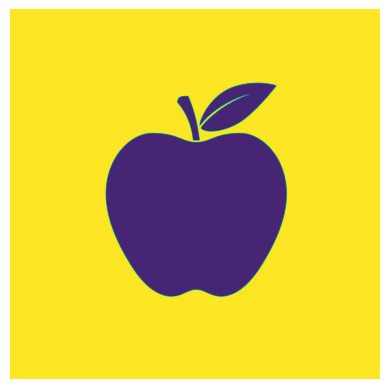

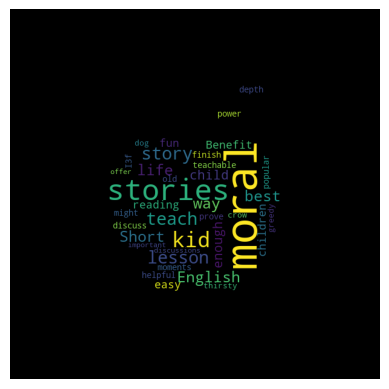

In [31]:
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from skimage.io import imread

file = open("C:\\Users\\Admin\\Desktop\\a.txt",'r')
text = file.read()



word_token = word_tokenize(text,language='english',preserve_line=False)
print("Number of words in the paragraph is ",len(word_token))
print()
print(word_token)



stop_words = set(STOPWORDS)

# wordcloud = WordCloud(width=800,height=800,
#                       background_color='black',
#                       stopwords=stop_words,
#                       min_font_size=10).generate(text)

# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()


image = imread("C:\\Users\\Admin\\Desktop\\apple.jpg")
plt.axis('off')
plt.imshow(image)
plt.show()

wordapple = WordCloud(width=800,height=800,
                      background_color='black',
                      stopwords=stop_words,
                      min_font_size=10,
                      mask=image).generate(text)

plt.imshow(wordapple)
plt.axis('off')
plt.show()

Week 12

`Sentimental analysis program`

In [40]:
from textblob import TextBlob

# Sample text for sentiment analysis
# text = "I love this product. It's amazing!"
text = input("Enter a statement to check the sentimental analysis : ")

# Create a TextBlob object with the input text
analysis = TextBlob(text)

# Perform sentiment analysis
if analysis.sentiment.polarity > 0:
    sentiment = "positive"
elif analysis.sentiment.polarity == 0:
    sentiment = "neutral"
else:
    sentiment = "negative"

# Output the sentiment
print(f"The sentiment of the text is {sentiment}.")


The sentiment of the text is negative.


In [3]:
import copy, math
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_common import  dlc, plot_data, plt_tumor_data, sigmoid, compute_cost_logistic
from plt_quad_logistic import plt_quad_logistic, plt_prob
plt.style.use('./deeplearning.mplstyle')

ModuleNotFoundError: No module named 'plt_quad_logistic'